In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.utils.io as io
import delfi.summarystats as ds
import lfimodels.glm.utils as utils
import matplotlib.pyplot as plt
import numpy as np

from lfimodels.glm.GLM import GLM
from lfimodels.glm.GLMStats import GLMStats
from delfi.utils.viz import plot_pdf

from DDELFI import DDELFI

%matplotlib inline

seed = 42
m = GLM(seed=seed)
p = utils.smoothing_prior(n_params=m.n_params, seed=seed)
s = GLMStats(n_summary=m.n_params)
g = dg.Default(model=m, prior=p, summary=s)

true_params, labels_params = utils.obs_params()
obs = utils.obs_data(true_params, seed=seed)
obs_stats = utils.obs_stats(true_params, seed=seed)

rerun = False  # if False, will try loading file from disk

try:
    assert rerun == False, 'rerun requested'
    sam = np.load('sam.npz')['arr_0']
except:
    sam = utils.pg_mcmc(true_params, obs)
    np.savez('sam.npz', sam)
    
seed = 99
g = dg.Default(model=m, prior=p, summary=s)
res = DDELFI(g, 
                   n_components=1,
                   obs=obs_stats, 
                   n_hiddens=[50], 
                   seed=seed, 
                   pilot_samples=1000,
                   reg_lambda=0.01,
                   prior_norm=False)

logs, tds, posteriors, _ = res.run(n_train=5000, 
                                n_rounds=3, 
                                minibatch=100, 
                                epochs=1000)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 15.39249229]:   0%|          | 6/5000 [00:00<02:13, 37.30it/s]    

loss=[ -1.79007051e+22]: 100%|██████████| 5000/5000 [01:23<00:00, 59.69it/s]


A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

loss=[ 15.45586777]:   0%|          | 6/5000 [00:00<02:12, 37.80it/s]

loss=[  1.90435926e+22]: 100%|██████████| 5000/5000 [01:23<00:00, 59.69it/s]


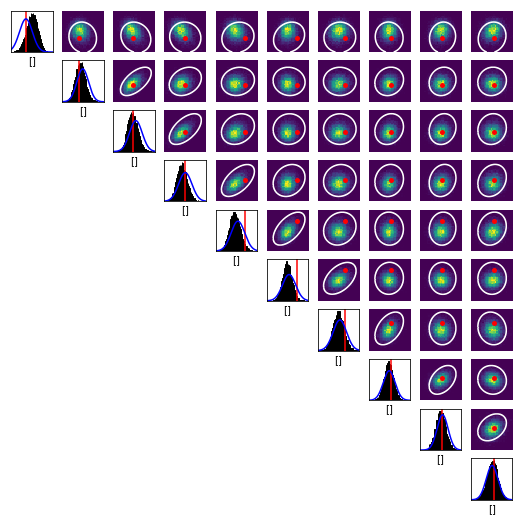

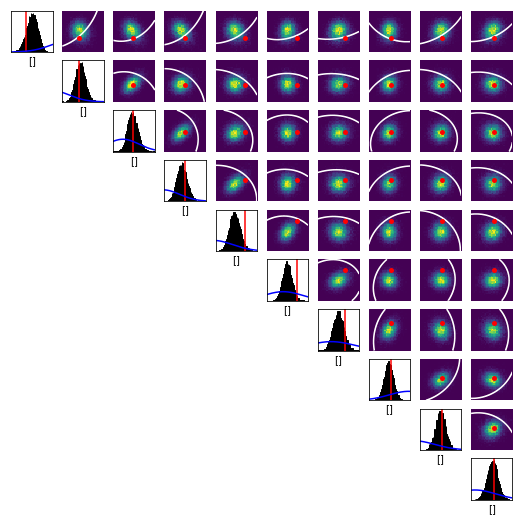

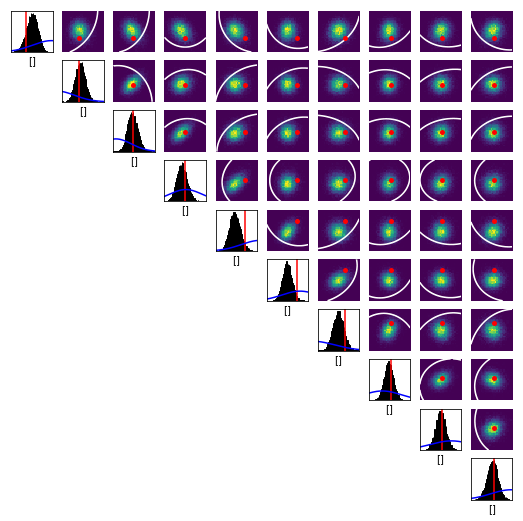

In [3]:
for r in range(3):
    posterior = posteriors[r]
    plot_pdf(posterior.xs[0], 
             lims=[-2,2], 
             samples=sam, 
             gt=true_params, 
             figsize=(9,9));

In [3]:
"""
# save posteriors
posterior = posteriors[-1]
import pickle
with open('/home/jm/Mackelab/team/Write/Manuscripts/2017_NIPS_NeuralModelInference/figs/glm_posterior_cdelfi.pkl','wb') as handle:
    pickle.dump(posterior, handle)
"""

## Version info

In [11]:
!cd /home/jm/repos/delfi/; git rev-parse origin/master

d3966254abdce44f401c2d5ff169e005534323b6


In [12]:
!cd /home/jm/repos/lfi-models/; git rev-parse origin/master

0b4ac370e991439298aef7f176478ffc6eab3f31


In [13]:
import matplotlib
matplotlib.__version__

'2.1.0'